In [1]:
from empca_residuals import *
from comparison_plots import comp_R2
%pylab inline

 This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.


Populating the interactive namespace from numpy and matplotlib


/usr/lib/python2.7/site-packages/setuptools-18.7.1-py2.7.egg/pkg_resources/__init__.py:1266: UserWarning: /home/price-jones/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).


In [2]:
def empca_compare(dr12,dr13,corr12=np.ones(7214),corr13=np.ones(7214)):

    longcorr12 = np.tile(corr12,(dr12.spectra_errs.shape[0],1))
    longcorr13 = np.tile(corr13,(dr13.spectra_errs.shape[0],1))
    
    Vdata12 = np.ma.var(dr12.residuals)
    Vnoise12 = np.ma.mean(np.sqrt(longcorr12*dr12.spectra_errs**2)**2)
    Vdata13 = np.ma.var(dr13.residuals)
    Vnoise13 = np.ma.mean(np.sqrt(longcorr13*dr13.spectra_errs**2)**2)


    dr12.pixelEMPCA(nvecs=5,deltR2=0,mad=False,correction=corr12)
    dr13.pixelEMPCA(nvecs=5,deltR2=0,mad=False,correction=corr13)
    print 'Simple analysis'
    print 'Vnoise12 = {0}, Vdata12 = {1},\nVnoise13 = {2}, Vdata13 = {3}'.format(Vnoise12,Vdata12,Vnoise13,Vdata13)
    print 'R2noise12 = {0}, R2noise13 = {1}'.format(1-Vnoise12/Vdata12, 1-Vnoise13/Vdata13)
    print 'EMPCA'
    print 'Vnoise12 = {0}, Vdata12 = {1},\nVnoise13 = {2}, Vdata13 = {3}'.format(dr12.empcaModelWeight.Vnoise,
                                                                                 dr12.empcaModelWeight.Vdata,
                                                                                 dr13.empcaModelWeight.Vnoise,
                                                                                 dr13.empcaModelWeight.Vdata)
    print 'R2noise12 = {0}, R2noise13 = {1}'.format(dr12.empcaModelWeight.R2noise,dr13.empcaModelWeight.R2noise)
    
    plt.figure(figsize=(10,8))
    plt.plot(dr12.empcaModelWeight.R2Array,label='DR12, R2noise = {0}'.format(dr12.empcaModelWeight.R2noise),
             lw=3,color='b')
    plt.plot(dr13.empcaModelWeight.R2Array,label='DR13, R2noise = {0}'.format(dr13.empcaModelWeight.R2noise),
             lw=3,color='r')
    plt.xlim(0,5)
    plt.ylim(0,1)
    plt.ylabel('R2')
    plt.xlabel('number of eigenvectors')
    plt.axhline(dr12.empcaModelWeight.R2noise,ls='--',lw=2,color='b') 
    plt.axhline(dr13.empcaModelWeight.R2noise,ls='--',lw=3,color='r')
    plt.legend(loc='best')

    plt.figure(figsize=(10,5))
    plt.plot(corr12,label='DR12')
    plt.plot(corr13,label='DR13')
    plt.xlim(0,7214)
    plt.xlabel('pixel')
    plt.ylabel('correction')
    plt.legend(loc='best')

    plt.figure(figsize=(10,5))
    plt.plot(corr12/corr13)
    #plt.ylim(0,69)
    plt.xlim(0,7214)
    plt.xlabel('pixel')
    plt.ylabel('DR12/DR13')

    plt.figure(figsize=(10,8))
    dr12.imshow(np.sqrt(dr12.spectra_errs**2/longcorr12)/np.sqrt(dr13.spectra_errs**2/longcorr13),
                title = 'ratio of uncorrected uncertainties (DR12/DR13)',cmap='plasma')
    
    plt.figure(figsize=(10,8))
    dr12.imshow(dr12.spectra_errs/dr13.spectra_errs,title = 'ratio of corrected uncertainties (DR12/DR13)',
                cmap='plasma')
    

In [4]:
npix=30
n6819_12 = empca_residuals('apogee','clusters',maskFilter,ask=True)
n6819_12.findResiduals()
corr12 = n6819_12.findCorrection(numpix=npix,savename='pickles/n6819_12_30px.pkl')
original12 = np.ma.copy(n6819_12.spectra_errs)

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: N6819
Data key: done


Done getting filter information


In [5]:
npix=30
n6819_13 = empca_residuals('apogee','clusters',maskFilter,ask=True)
n6819_13.findResiduals()
corr13 = n6819_13.findCorrection(numpix=npix,savename='pickles/n6819_13_30px.pkl')
original13 = np.ma.copy(n6819_13.spectra_errs)

Which data release? (Enter for 13): 13
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: N6819
Data key: done


Done getting filter information


       iter        R2             rchi2
EMPCA  1/25       0.02841933      1.28408186
EMPCA  2/25       0.43952738      0.72847226
EMPCA  3/25       0.48232930      0.68300931
EMPCA  4/25       0.49774979      0.66845632
EMPCA  5/25       0.50263241      0.66205926
EMPCA  6/25       0.50295083      0.65877325
EMPCA  7/25       0.50089158      0.65707290
EMPCA  8/25       0.49731979      0.65675062
EMPCA  9/25       0.49333114      0.65726420
EMPCA 10/25       0.48995433      0.65711658
EMPCA 11/25       0.49048699      0.65487969
EMPCA 12/25       0.49192511      0.65239666
EMPCA 13/25       0.49351309      0.65032947
EMPCA 14/25       0.49484336      0.64884083
EMPCA 15/25       0.49574366      0.64790547
EMPCA 16/25       0.49628715      0.64738041
EMPCA 17/25       0.49664042      0.64710961
EMPCA 18/25       0.49691802      0.64695991
EMPCA 19/25       0.49713540      0.64685661
EMPCA 20/25       0.49731205      0.64676668
EMPCA 21/25       0.49746365      0.64667826
EMPCA 22/25    

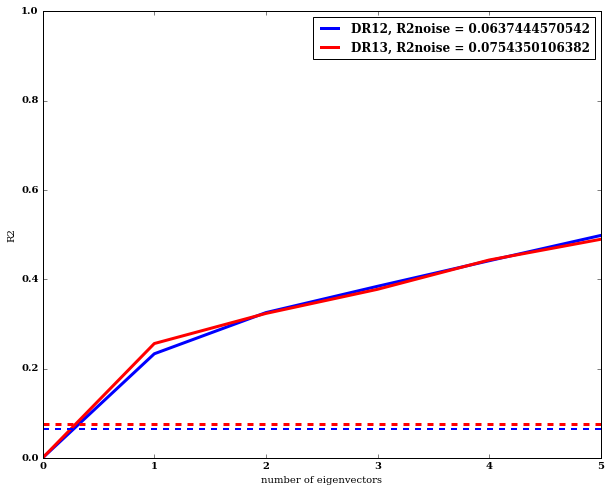

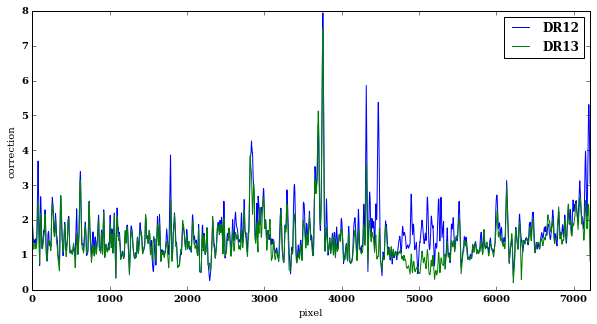

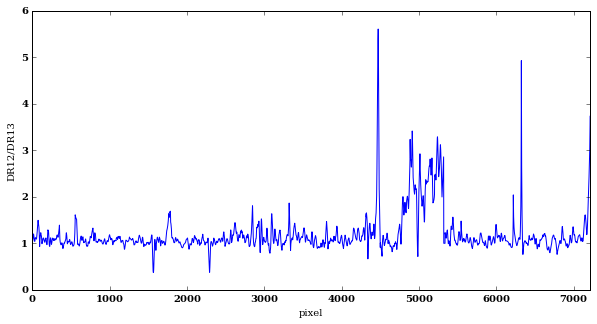

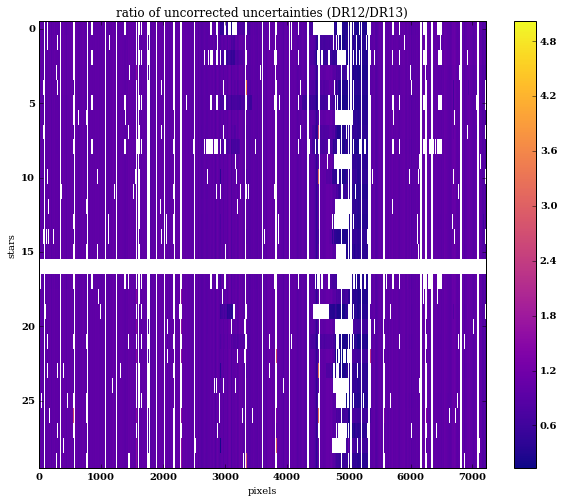

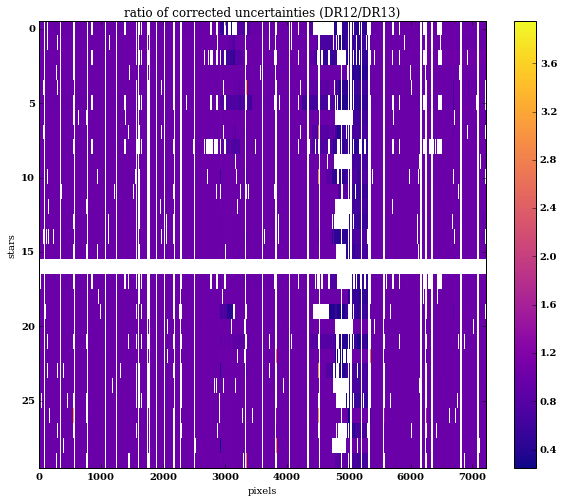

In [7]:
empca_compare(n6819_12,n6819_13,corr12=corr12,corr13=corr13)

In [3]:
npix=30
n2158_12 = empca_residuals('apogee','clusters',maskFilter,ask=True)
n2158_12.findResiduals()
corr12 = n2158_12.findCorrection(numpix=npix,savename='test.pkl')

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: N2158
Data key: done


Done getting filter information
Total 0 of 10 stars missing

In [4]:
npix=30
n2158_13 = empca_residuals('apogee','clusters',maskFilter,ask=True)
n2158_13.findResiduals()
corr13 = n2158_13.findCorrection(numpix=npix,savename='test.pkl')

Which data release? (Enter for 13): 13
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: N2158
Data key: done


Done getting filter information
Total 0 of 10 stars missing

       iter        R2             rchi2
EMPCA  1/25       0.02457769      1.90085754
EMPCA  2/25       0.64617332      0.74610012
EMPCA  3/25       0.72602048      0.59528497
EMPCA  4/25       0.70166569      0.64048498
EMPCA  5/25       0.74091428      0.56652777
EMPCA  6/25       0.79172745      0.46398376
EMPCA  7/25       0.80531420      0.43352090
EMPCA  8/25       0.80731063      0.42620372
EMPCA  9/25       0.80705733      0.42361045
EMPCA 10/25       0.80636426      0.42215404
EMPCA 11/25       0.80560314      0.42110232
EMPCA 12/25       0.80487979      0.42024648
EMPCA 13/25       0.80423673      0.41950061
EMPCA 14/25       0.80369372      0.41882187
EMPCA 15/25       0.80325904      0.41818814
EMPCA 16/25       0.80293393      0.41758872
EMPCA 17/25       0.80271509      0.41701927
EMPCA 18/25       0.80259615      0.41647888
EMPCA 19/25       0.80256867      0.41596829
EMPCA 20/25       0.80262290      0.41548886
EMPCA 21/25       0.80274836      0.41504188
EMPCA 22/25    

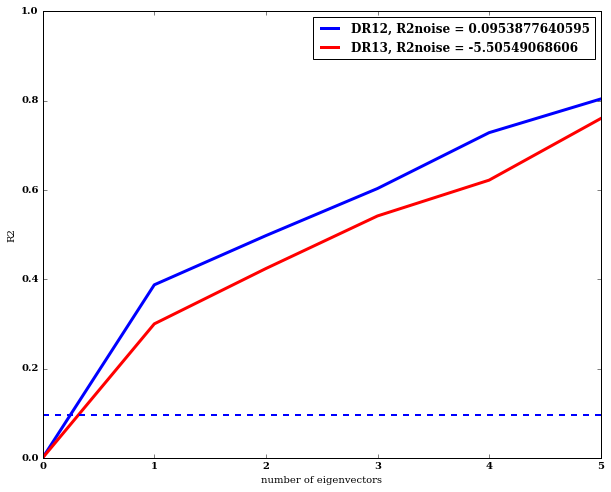

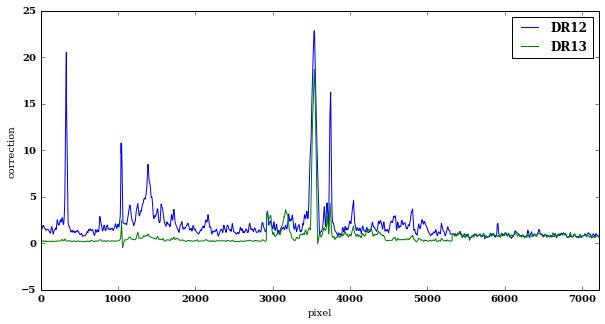

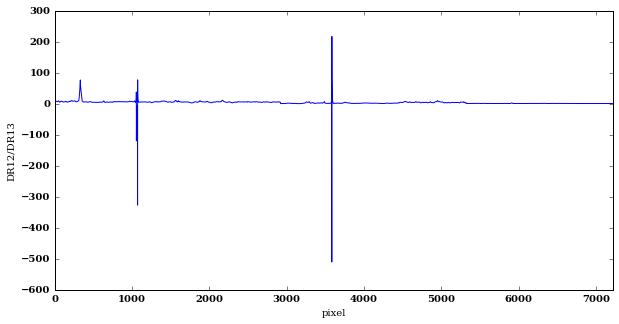

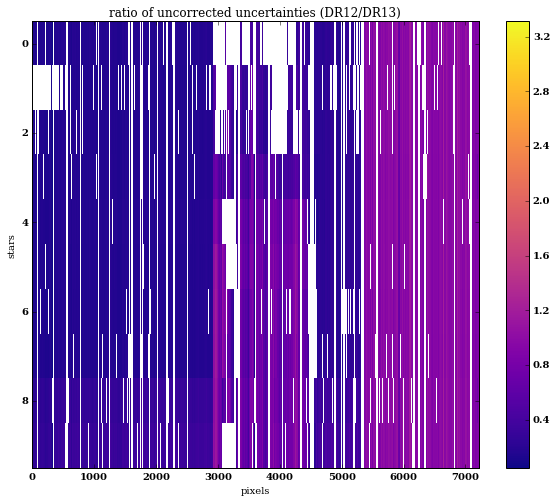

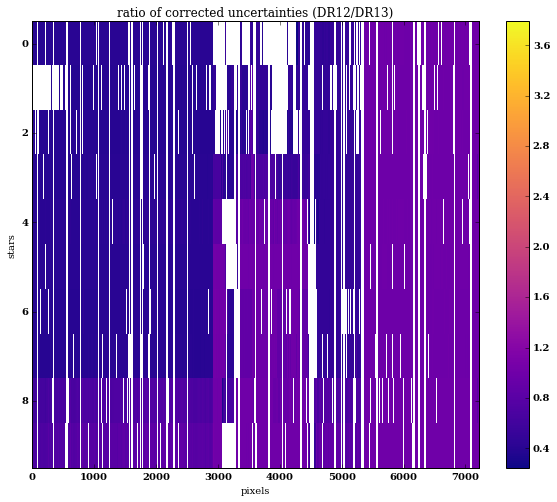

In [5]:
empca_compare(n2158_12,n2158_13,corr12=corr12,corr13=corr13)

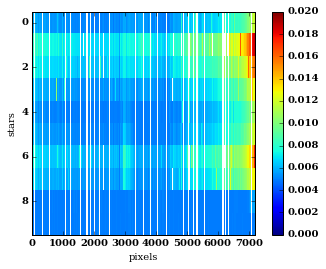

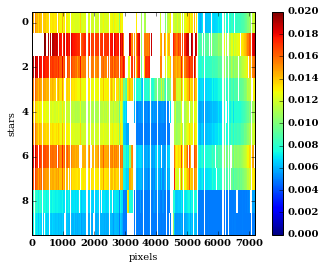

In [8]:
n2158_12.imshow(n2158_12.spectra_errs,vmin=0,vmax=0.02)
plt.figure()
n2158_13.imshow(n2158_13.spectra_errs,vmin=0,vmax=0.02)

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: M67
Data key: done


Done getting filter information
Total 0 of 24 stars missing


Which data release? (Enter for 13): 13
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: M67
Data key: done


Done getting filter information
Total 0 of 24 stars missing


       iter        R2             rchi2
EMPCA  1/25       0.02297218      1.39130933
EMPCA  2/25       0.44975821      0.79109440
EMPCA  3/25       0.55285737      0.65321102
EMPCA  4/25       0.59211286      0.60364870
EMPCA  5/25       0.60570981      0.58783675
EMPCA  6/25       0.61074763      0.58270245
EMPCA  7/25       0.61432545      0.57895488
EMPCA  8/25       0.61738217      0.57558430
EMPCA  9/25       0.61977904      0.57291510
EMPCA 10/25       0.62156565      0.57094205
EMPCA 11/25       0.62287887      0.56951091
EMPCA 12/25       0.62383457      0.56848441
EMPCA 13/25       0.62452214      0.56775658
EMPCA 14/25       0.62501196      0.56724510
EMPCA 15/25       0.62535885      0.56688712
EMPCA 16/25       0.62560413      0.56663634
EMPCA 17/25       0.62577792      0.56645979
EMPCA 18/25       0.62590161      0.56633454
EMPCA 19/25       0.62599022      0.56624488
EMPCA 20/25       0.62605418      0.56618008
EMPCA 21/25       0.62610072      0.56613279
EMPCA 22/25   

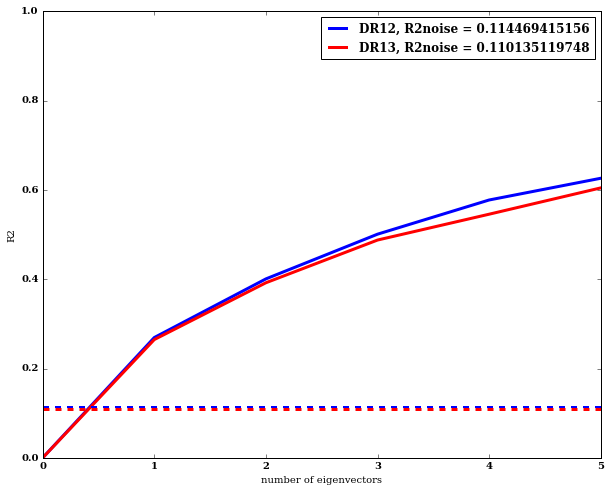

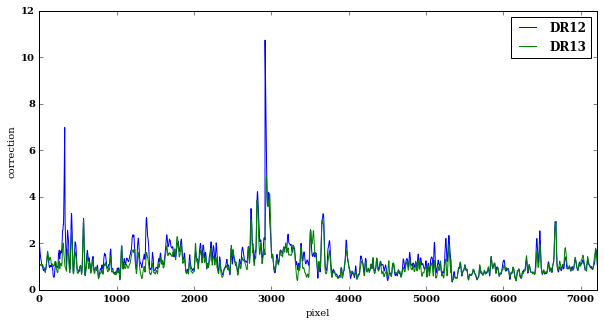

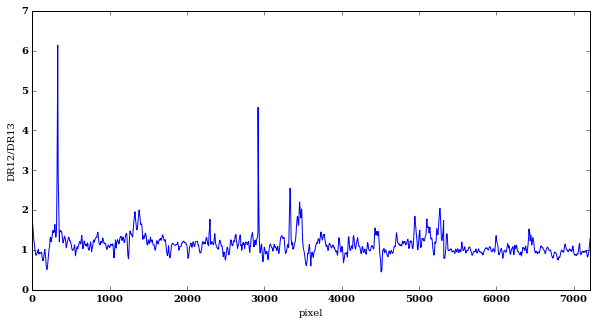

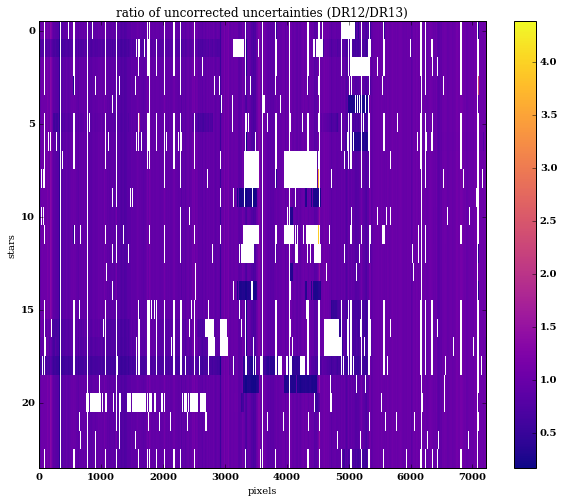

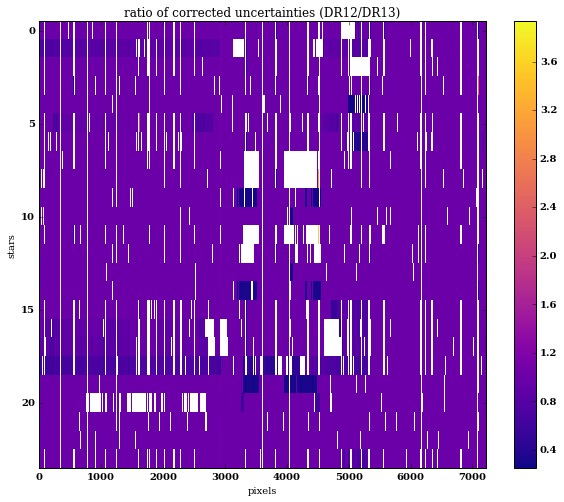

In [9]:
npix=30
m67_12 = empca_residuals('apogee','clusters',maskFilter,ask=True)
m67_12.findResiduals()
corr12 = m67_12.findCorrection(numpix=npix,savename='test.pkl')
npix=30
m67_13 = empca_residuals('apogee','clusters',maskFilter,ask=True)
m67_13.findResiduals()
corr13 = m67_13.findCorrection(numpix=npix,savename='test.pkl')
empca_compare(m67_12,m67_13,corr12=corr12,corr13=corr13)

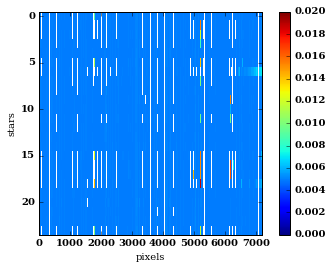

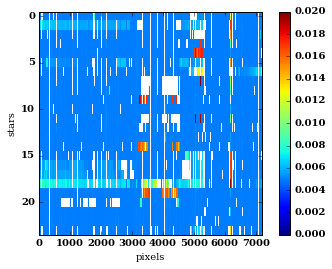

In [10]:
m67_12.imshow(m67_12.spectra_errs,vmin=0,vmax=0.02)
plt.figure()
m67_13.imshow(m67_13.spectra_errs,vmin=0,vmax=0.02)

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: N6819
Data key: done


Done getting filter information
Total 0 of 30 stars missing


Which data release? (Enter for 13): 13
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: N6819
Data key: done


Done getting filter information
Total 0 of 30 stars missing


       iter        R2             rchi2
EMPCA  1/25       0.02695929      1.88184077
EMPCA  2/25       0.42305820      1.08595416
EMPCA  3/25       0.46096002      1.00957797
EMPCA  4/25       0.47688548      0.98071734
EMPCA  5/25       0.48418023      0.96800443
EMPCA  6/25       0.48862549      0.96192138
EMPCA  7/25       0.49222627      0.95780245
EMPCA  8/25       0.49467453      0.95490804
EMPCA  9/25       0.49624843      0.95288517
EMPCA 10/25       0.49727384      0.95156167
EMPCA 11/25       0.49794289      0.95069553
EMPCA 12/25       0.49835195      0.95013040
EMPCA 13/25       0.49858271      0.94976033
EMPCA 14/25       0.49870007      0.94951431
EMPCA 15/25       0.49874913      0.94934771
EMPCA 16/25       0.49876028      0.94923227
EMPCA 17/25       0.49875339      0.94914946
EMPCA 18/25       0.49874058      0.94908751
EMPCA 19/25       0.49872873      0.94904002
EMPCA 20/25       0.49872107      0.94900424
EMPCA 21/25       0.49871850      0.94897892
EMPCA 22/25   

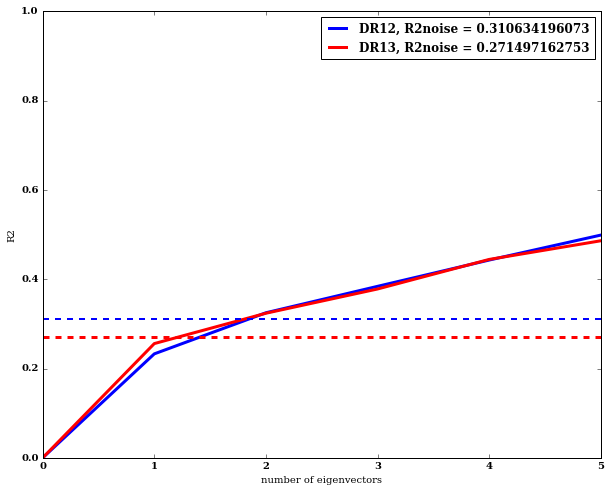

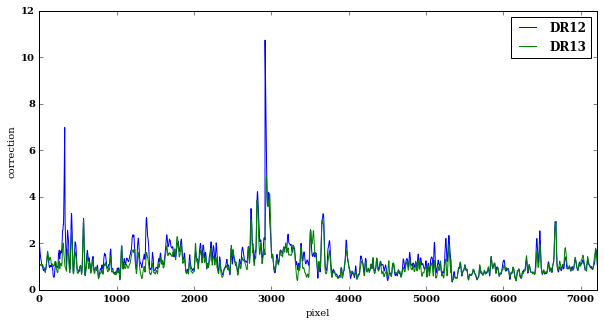

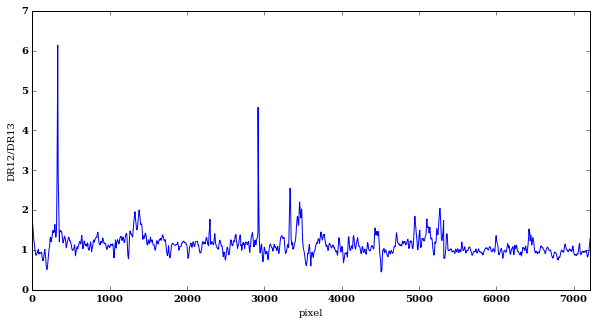

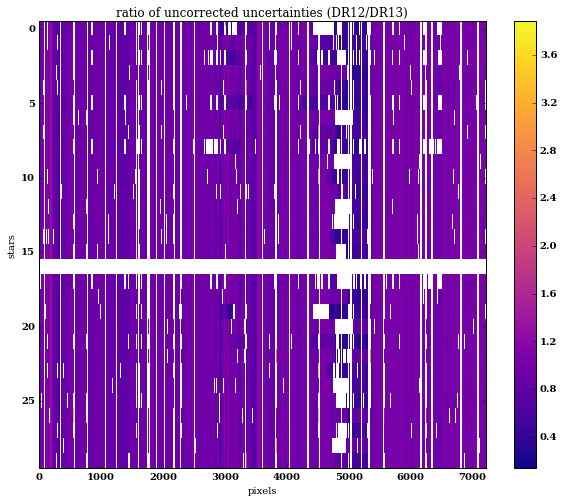

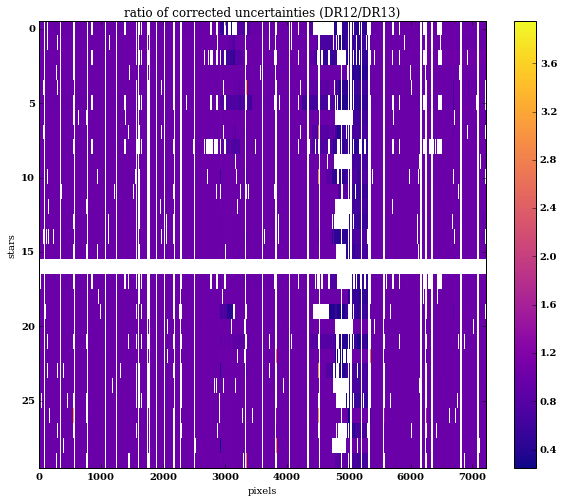

In [11]:
n6819_12 = empca_residuals('apogee','clusters',maskFilter,ask=True)
n6819_12.findResiduals()
n6819_13 = empca_residuals('apogee','clusters',maskFilter,ask=True)
n6819_13.findResiduals()
empca_compare(n6819_12,n6819_13,corr12=corr12,corr13=corr13)

In [28]:
Vdata12 = np.ma.var(n2158_12.residuals)
Vnoise12 = np.ma.mean(n2158_12.spectra_errs**2)
Vdata13 = np.ma.var(n2158_13.residuals)
Vnoise13 = np.ma.mean(n2158_13.spectra_errs**2)
1-Vnoise12/Vdata12, 1-Vnoise13/Vdata13, Vnoise12, Vdata12, Vnoise13, Vdata13

(0.47475278914802632,
 -0.41634992805904791,
 4.6383894034428012e-05,
 8.8308691747627436e-05,
 0.00012832174336057856,
 9.060031057185806e-05)

In [11]:
npix=50
corr12 = n6819_12.findCorrection(numpix=npix,savename='test.pkl')

In [12]:
npix=50
corr13 = n6819_13.findCorrection(numpix=npix,savename='test.pkl')

       iter        R2             rchi2
EMPCA  1/25       0.02827434      1.32212416
EMPCA  2/25       0.44313513      0.73182096
EMPCA  3/25       0.48726678      0.68344231
EMPCA  4/25       0.50101298      0.66848712
EMPCA  5/25       0.50379251      0.66115628
EMPCA  6/25       0.50099992      0.65708370
EMPCA  7/25       0.49621098      0.65504108
EMPCA  8/25       0.49259169      0.65370176
EMPCA  9/25       0.49223843      0.65186014
EMPCA 10/25       0.49362009      0.65012231
EMPCA 11/25       0.49494302      0.64910076
EMPCA 12/25       0.49587205      0.64861862
EMPCA 13/25       0.49651946      0.64839764
EMPCA 14/25       0.49697613      0.64828343
EMPCA 15/25       0.49730100      0.64820599
EMPCA 16/25       0.49753729      0.64813580
EMPCA 17/25       0.49771367      0.64806282
EMPCA 18/25       0.49784765      0.64798608
EMPCA 19/25       0.49794996      0.64790820
EMPCA 20/25       0.49802777      0.64783260
EMPCA 21/25       0.49808643      0.64776213
EMPCA 22/25    

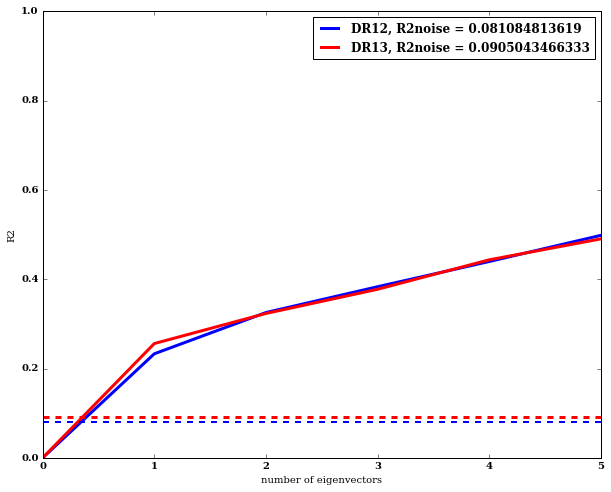

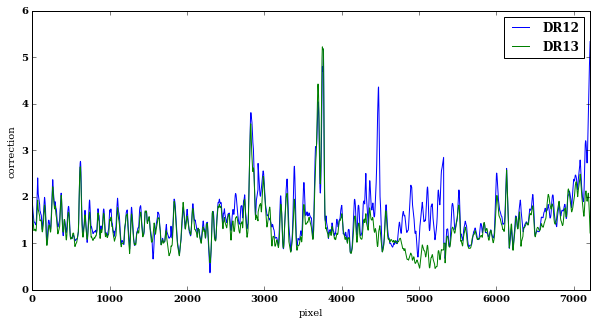

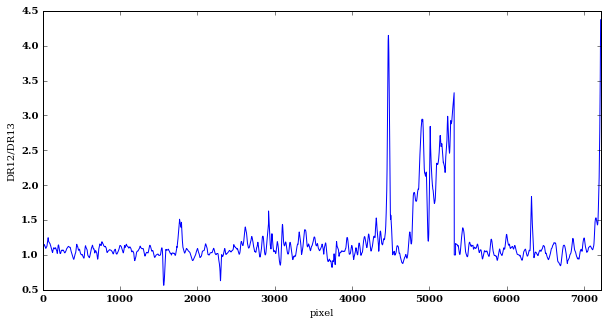

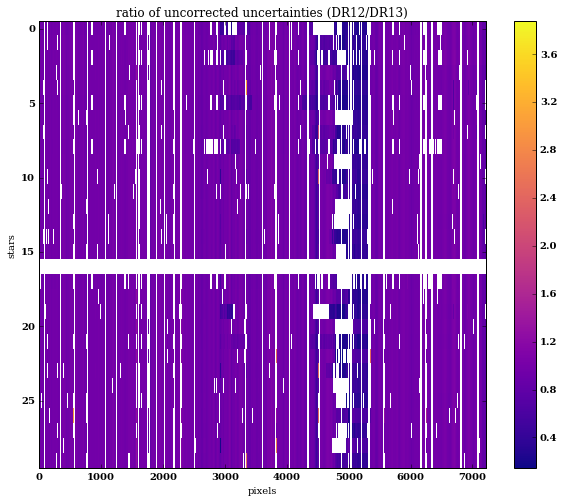

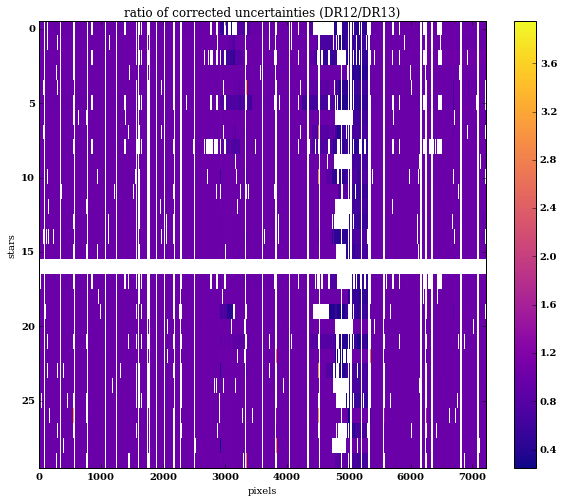

In [13]:
empca_compare(n6819_12,n6819_13,corr12=corr12,corr13=corr13)

In [14]:
npix=30
corr12 = n6819_12.findCorrection(numpix=npix,savename='test.pkl')

In [15]:
npix=30
corr13 = n6819_13.findCorrection(numpix=npix,savename='test.pkl')

       iter        R2             rchi2
EMPCA  1/25       0.02841933      1.28408186
EMPCA  2/25       0.43952738      0.72847226
EMPCA  3/25       0.48232930      0.68300931
EMPCA  4/25       0.49774979      0.66845632
EMPCA  5/25       0.50263241      0.66205926
EMPCA  6/25       0.50295083      0.65877325
EMPCA  7/25       0.50089158      0.65707290
EMPCA  8/25       0.49731979      0.65675062
EMPCA  9/25       0.49333114      0.65726420
EMPCA 10/25       0.48995433      0.65711658
EMPCA 11/25       0.49048699      0.65487969
EMPCA 12/25       0.49192511      0.65239666
EMPCA 13/25       0.49351309      0.65032947
EMPCA 14/25       0.49484336      0.64884083
EMPCA 15/25       0.49574366      0.64790547
EMPCA 16/25       0.49628715      0.64738041
EMPCA 17/25       0.49664042      0.64710961
EMPCA 18/25       0.49691802      0.64695991
EMPCA 19/25       0.49713540      0.64685661
EMPCA 20/25       0.49731205      0.64676668
EMPCA 21/25       0.49746365      0.64667826
EMPCA 22/25    

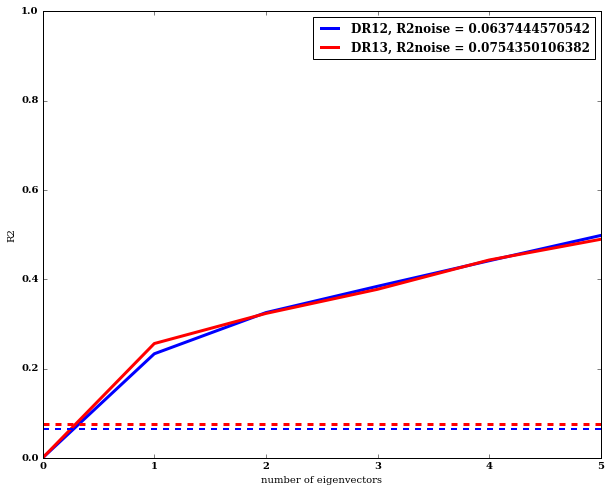

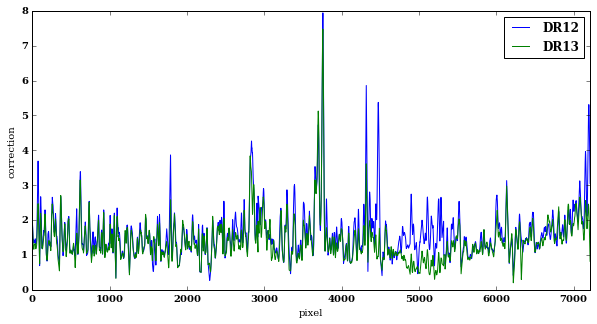

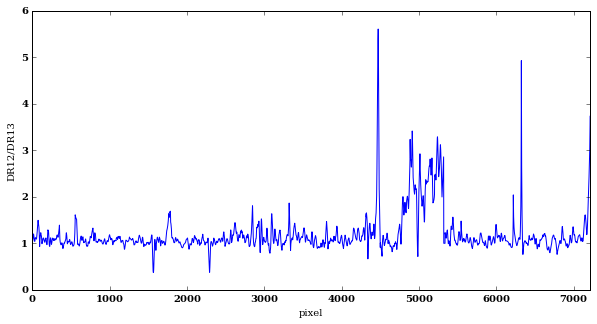

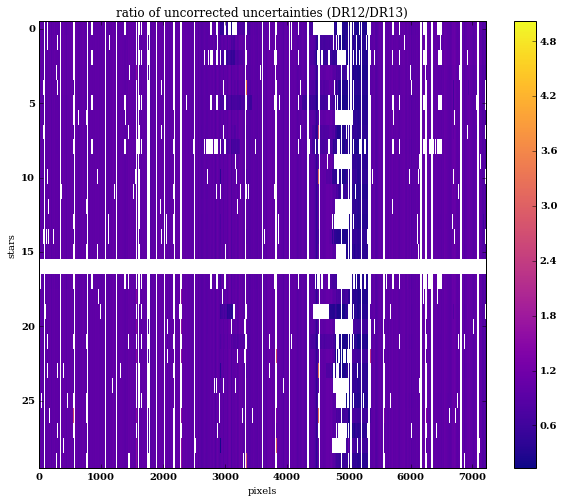

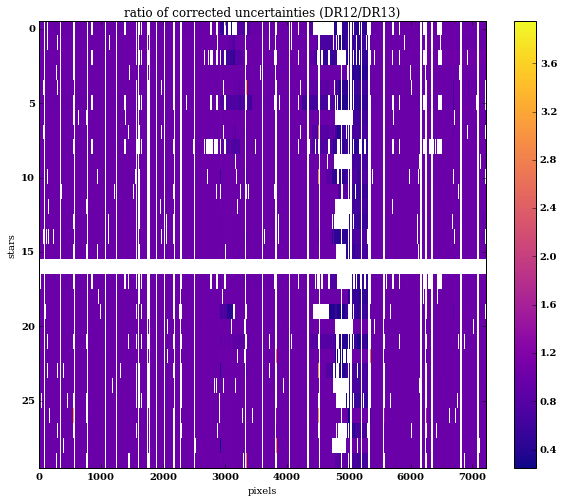

In [16]:
empca_compare(n6819_12,n6819_13,corr12=corr12,corr13=corr13)

In [17]:
npix=10
corr12 = n6819_12.findCorrection(numpix=npix,savename='test.pkl')

In [18]:
npix=10
corr13 = n6819_13.findCorrection(numpix=npix,savename='test.pkl')

[] (0,)
[] (array([], dtype=int64),)


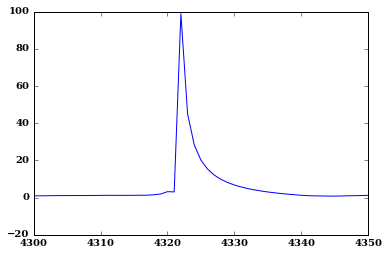

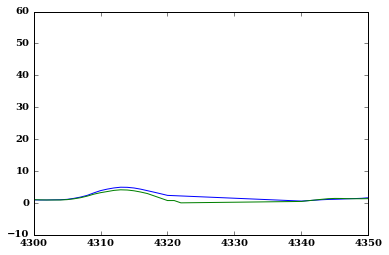

In [19]:
plt.figure()
plt.plot(corr12/corr13)
plt.xlim(4300,4350)
plt.figure()
plt.plot(corr12)
plt.plot(corr13)
plt.xlim(4300,4350)
print corr13[np.where(np.fabs(corr13)<0.005)],np.where(np.fabs(corr13)<0)[0].shape
print corr12[np.where(np.fabs(corr12)<0.005)],np.where(np.fabs(corr12)<0.005)

       iter        R2             rchi2
EMPCA  1/25       0.02531113      1.18043224
EMPCA  2/25       0.43492547      0.72004253
EMPCA  3/25       0.48359593      0.67097242
EMPCA  4/25       0.49817784      0.65669114
EMPCA  5/25       0.50135281      0.65190471
EMPCA  6/25       0.50154731      0.64769435
EMPCA  7/25       0.49767214      0.64583962
EMPCA  8/25       0.49296115      0.64486689
EMPCA  9/25       0.49066193      0.64319275
EMPCA 10/25       0.49147957      0.64093122
EMPCA 11/25       0.49306825      0.63922241
EMPCA 12/25       0.49421715      0.63829956
EMPCA 13/25       0.49494042      0.63786195
EMPCA 14/25       0.49543252      0.63766206
EMPCA 15/25       0.49581495      0.63757492
EMPCA 16/25       0.49614981      0.63754236
EMPCA 17/25       0.49645552      0.63753604
EMPCA 18/25       0.49672342      0.63753965
EMPCA 19/25       0.49694426      0.63754048
EMPCA 20/25       0.49712121      0.63752871
EMPCA 21/25       0.49726388      0.63749975
EMPCA 22/25    

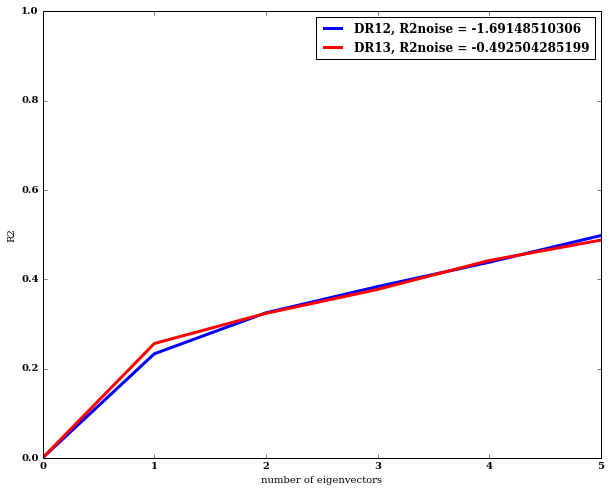

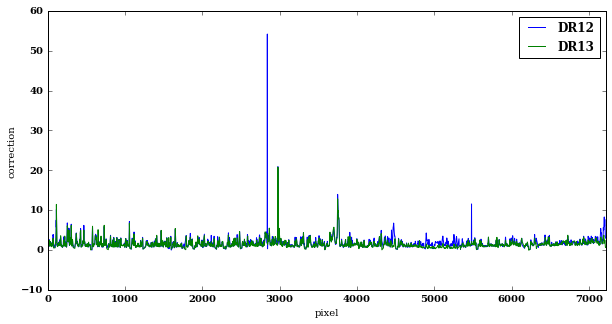

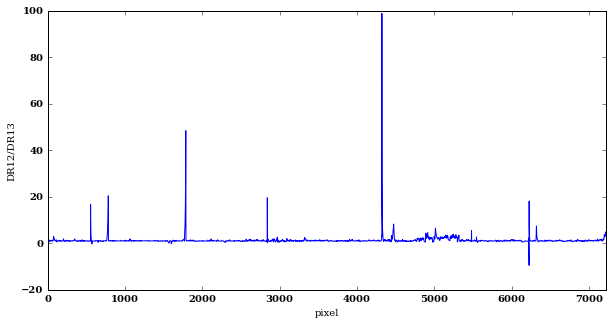

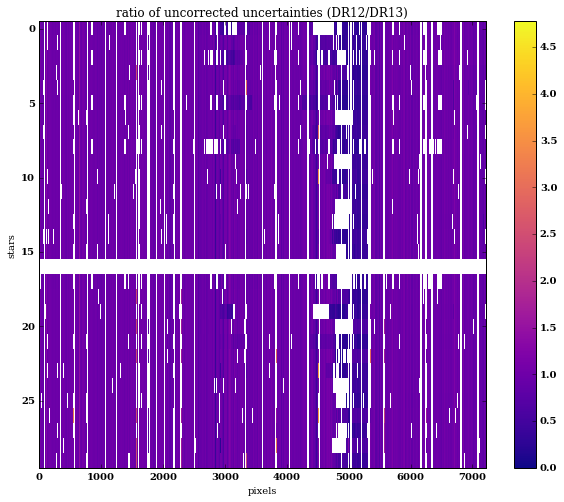

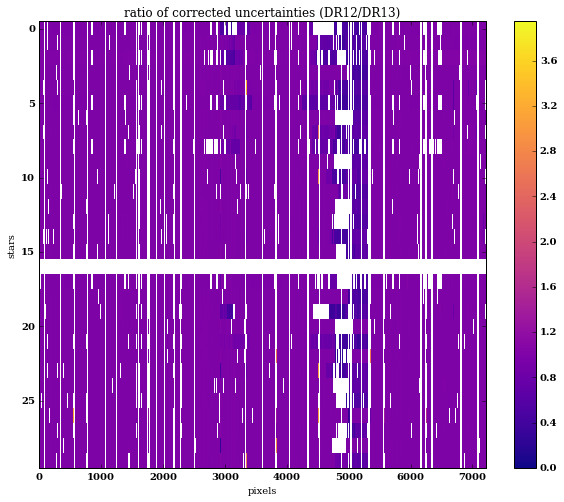

In [20]:
empca_compare(n6819_12,n6819_13,corr12=corr12,corr13=corr13)

In [21]:
npix=30
corr12 = n6819_12.findCorrection(numpix=npix,savename='test.pkl')

In [22]:
npix=30
corr13 = n6819_13.findCorrection(numpix=npix,savename='test.pkl')

       iter        R2             rchi2
EMPCA  1/25       0.02839295      1.28338248
EMPCA  2/25       0.43952493      0.72826948
EMPCA  3/25       0.48232899      0.68296517
EMPCA  4/25       0.49777651      0.66832574
EMPCA  5/25       0.50268250      0.66187921
EMPCA  6/25       0.50303568      0.65850052
EMPCA  7/25       0.50103921      0.65663222
EMPCA  8/25       0.49760304      0.65608897
EMPCA  9/25       0.49366490      0.65653829
EMPCA 10/25       0.49014520      0.65665538
EMPCA 11/25       0.49030605      0.65481266
EMPCA 12/25       0.49170360      0.65242930
EMPCA 13/25       0.49332690      0.65032977
EMPCA 14/25       0.49472568      0.64876955
EMPCA 15/25       0.49568174      0.64777544
EMPCA 16/25       0.49625629      0.64721483
EMPCA 17/25       0.49662646      0.64692476
EMPCA 18/25       0.49691489      0.64676463
EMPCA 19/25       0.49713965      0.64665455
EMPCA 20/25       0.49732145      0.64655973
EMPCA 21/25       0.49747668      0.64646784
EMPCA 22/25    

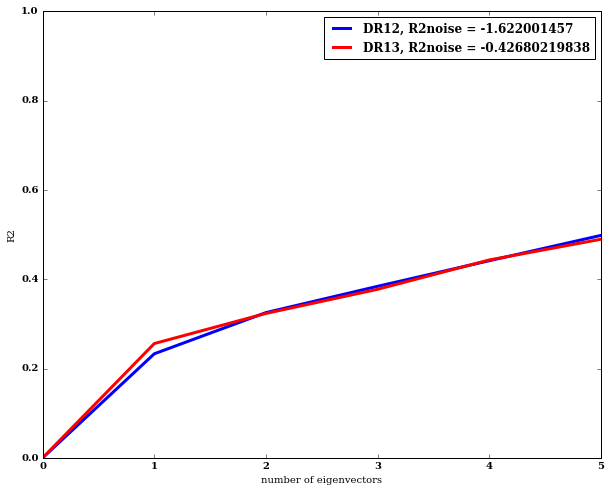

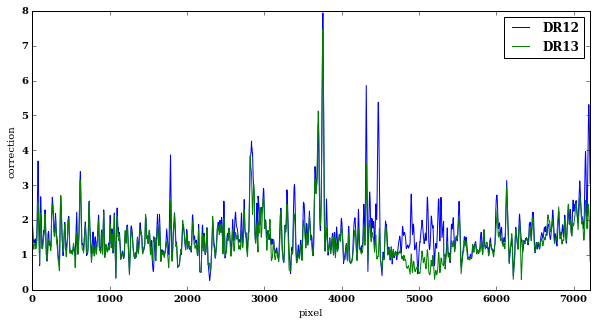

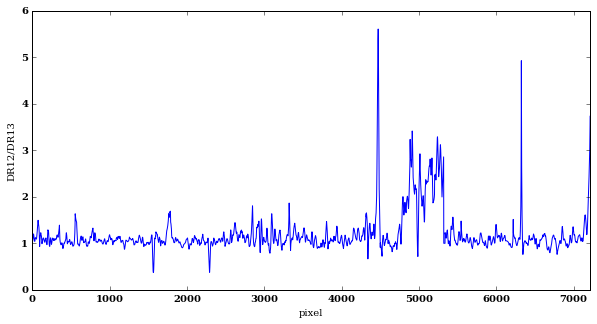

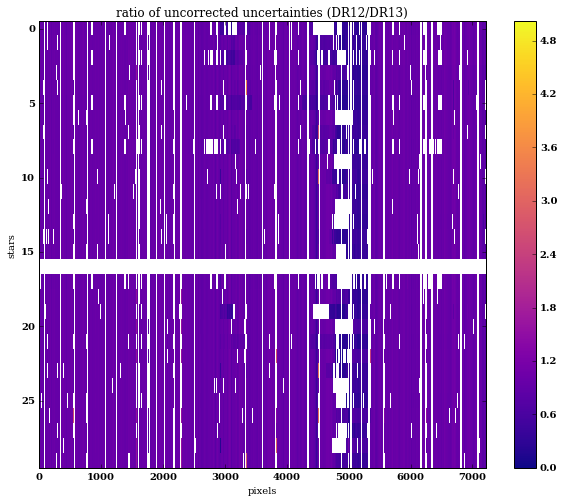

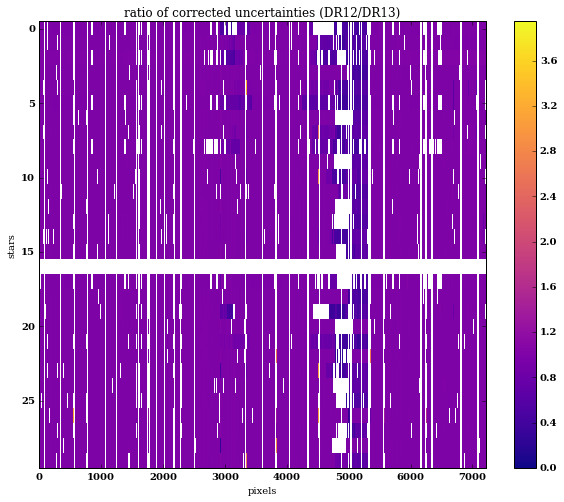

In [23]:
empca_compare(n6819_12,n6819_13,corr12=corr12,corr13=corr13)

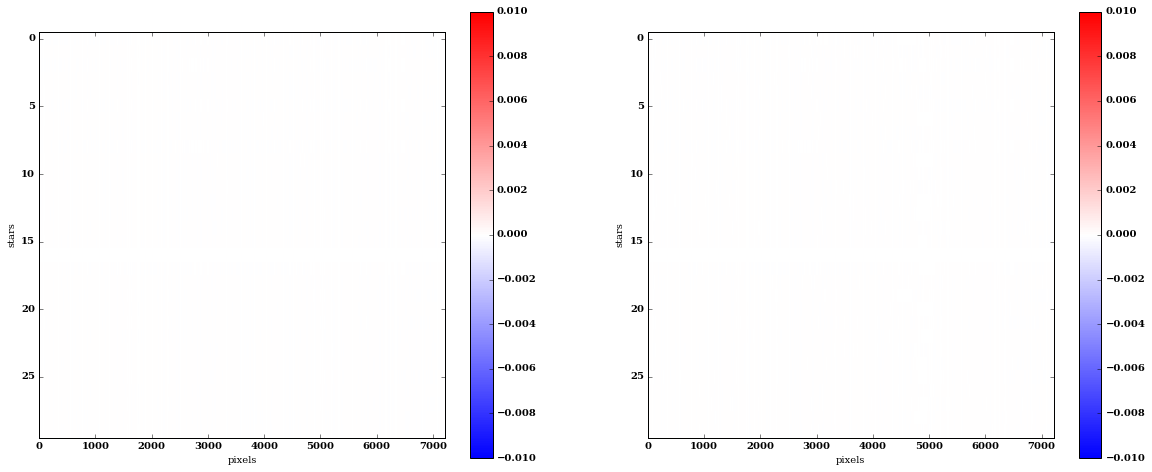

In [24]:
bound = 0.01
plt.figure(figsize=(20,8))
plt.subplot(121)
n6819_12.imshow(n6819_12.spectra_errs-original12,cmap='bwr',vmin=-bound,vmax=bound)
plt.subplot(122)
n6819_13.imshow(n6819_13.spectra_errs-original13,cmap='bwr',vmin=-bound,vmax=bound)